# TD4


In [1]:
import numpy as np
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

## Exo 1


In [2]:
D = [
    [0, 1, 2, 2, 3],
    [1, 0, 1, 1, 2],
    [2, 1, 0, 2, 3],
    [2, 1, 2, 0, 1],
    [3, 2, 3, 1, 0],
]

## Exo 2


In [3]:
# Fonction MDS classique
def monMDS(D, p_prime):
    """
    Implémente le MDS classique.

    Arguments :
    - D : matrice des distances.
    - p_prime : nombre de dimensions cibles.

    Retourne :
    - Les coordonnées des points dans l'espace de dimension réduite.
    """
    # Nombre de points
    N = D.shape[0]

    # Vecteur colonne rempli de 1
    ones = np.ones((N, 1))

    # Vecteur colonne one * one^T
    onesTimesOnesT = ones @ ones.T

    # Calcul de la matrice de produits scalaires centrée B
    B = -0.5 * (
        D
        - (1 / N) * np.dot(D, onesTimesOnesT)
        - (1 / N) * np.dot(onesTimesOnesT, D)
        + (1 / N**2) * np.dot(onesTimesOnesT, np.dot(D, onesTimesOnesT))
    )

    # Décomposition en valeurs propres
    eigvals, eigvecs = np.linalg.eigh(B)

    # Trier les valeurs propres en ordre décroissant
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Sélectionner les p' plus grandes valeurs propres et vecteurs propres associés
    L_p = np.diag(
        np.sqrt(eigvals[:p_prime])
    )  # Racine carrée des p' plus grandes valeurs propres
    V_p = eigvecs[:, :p_prime]  # Les p' vecteurs propres

    # Calcul des coordonnées des points dans l'espace réduit
    X_p = np.dot(V_p, L_p)

    return X_p

In [4]:
# Générer un jeu de données aléatoires dans un espace 3D
# np.random.seed(0)  # Pour la reproductibilité
points_3D = np.random.rand(6, 3)  # 6 points dans l'espace euclidien 3D

# Calculer la matrice des distances euclidiennes entre les points
D = squareform(pdist(points_3D))

# Appliquer le MDS manuel pour réduire à 2 dimensions
points_2D = monMDS(D, 2)

# Appliquer l'ACP sur les mêmes données (normalisées)
pca = PCA(n_components=2)
points_acp_2D = pca.fit_transform(points_3D)

# Appliquer le MDS de scikit-learn avec metric=True
mds_sklearn = MDS(n_components=2, dissimilarity="precomputed", metric=True, random_state=0)
points_mds_sklearn = mds_sklearn.fit_transform(D)

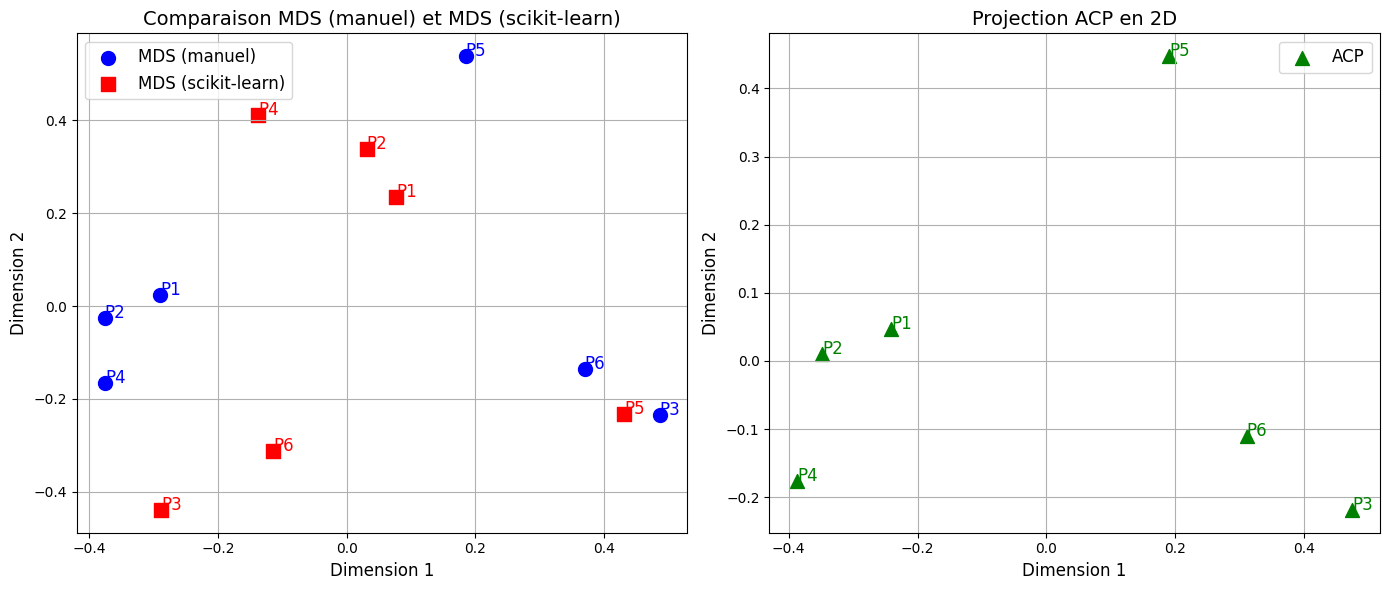

In [5]:
# Créer une figure plus large avec deux sous-graphes
plt.figure(figsize=(14, 6))

# Premier sous-graphe : MDS manuel et scikit-learn
plt.subplot(1, 2, 1)
plt.scatter(points_2D[:, 0], points_2D[:, 1], color="blue", label="MDS (manuel)", s=100, marker='o')
plt.scatter(points_mds_sklearn[:, 0], points_mds_sklearn[:, 1], color="red", label="MDS (scikit-learn)", s=100, marker='s')

# Ajouter les étiquettes aux points MDS
for i in range(len(points_2D)):
    plt.text(points_2D[i, 0], points_2D[i, 1], f"P{i+1}", fontsize=12, color="blue")
    plt.text(points_mds_sklearn[i, 0], points_mds_sklearn[i, 1], f"P{i+1}", fontsize=12, color="red")

# Configurer le sous-graphe MDS
plt.title("Comparaison MDS (manuel) et MDS (scikit-learn)", fontsize=14)
plt.xlabel("Dimension 1", fontsize=12)
plt.ylabel("Dimension 2", fontsize=12)
plt.grid(True)
plt.legend(loc="best", fontsize=12)

# Deuxième sous-graphe : ACP seul
plt.subplot(1, 2, 2)
plt.scatter(points_acp_2D[:, 0], points_acp_2D[:, 1], color="green", label="ACP", s=100, marker='^')

# Ajouter les étiquettes aux points ACP
for i in range(len(points_acp_2D)):
    plt.text(points_acp_2D[i, 0], points_acp_2D[i, 1], f"P{i+1}", fontsize=12, color="green")

# Configurer le sous-graphe ACP
plt.title("Projection ACP en 2D", fontsize=14)
plt.xlabel("Dimension 1", fontsize=12)
plt.ylabel("Dimension 2", fontsize=12)
plt.grid(True)
plt.legend(loc="best", fontsize=12)

# Afficher les deux sous-graphes
plt.tight_layout()
plt.show()